<a href="https://colab.research.google.com/github/Statistically-Inclined/Complete-ML/blob/main/Cross_Validation_Pipeline_GridSearch_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [11]:
df_churn = pd.read_csv('Churn_Modelling.csv')
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df_churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df_geo = pd.get_dummies(df_churn['Geography'])
df_geo

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [14]:
df_gender = pd.get_dummies(df_churn['Gender'], drop_first=True)
df_gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [15]:
df_churn['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [16]:
df = pd.concat([df_churn, df_geo, df_gender], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0


In [17]:
df.drop(['Geography', 'Gender'], axis=1, inplace=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0


In [20]:
X = df.drop('Exited', axis=1).values
y = df['Exited'].values

In [21]:
X

array([[619.,  42.,   2., ...,   0.,   0.,   0.],
       [608.,  41.,   1., ...,   0.,   1.,   0.],
       [502.,  42.,   8., ...,   0.,   0.,   0.],
       ...,
       [709.,  36.,   7., ...,   0.,   0.,   0.],
       [772.,  42.,   3., ...,   1.,   0.,   1.],
       [792.,  28.,   4., ...,   0.,   0.,   0.]])

In [22]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 12), (2000, 12), (8000,), (2000,))

In [25]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [26]:
scale.fit(X_train)
X_train_scale = scale.transform(X_train)
X_test_scale = scale.transform(X_test)

In [27]:
X_train_scale

array([[-0.29715318, -0.75969054,  0.68759149, ..., -0.57927478,
        -0.57812007,  0.90202422],
       [-0.17280071,  0.38602137, -0.69563147, ...,  1.72629647,
        -0.57812007,  0.90202422],
       [-0.25570235,  0.48149736, -1.04143721, ..., -0.57927478,
        -0.57812007, -1.10861768],
       ...,
       [ 1.64067279, -0.56873855,  1.03339723, ...,  1.72629647,
        -0.57812007,  0.90202422],
       [ 0.67694116,  0.19506939,  1.37920297, ..., -0.57927478,
        -0.57812007,  0.90202422],
       [ 0.03445341, -0.28231058, -1.04143721, ..., -0.57927478,
         1.72974448, -1.10861768]])

In [29]:
X_test_scale

array([[-1.27124751,  2.20006523,  0.68759149, ...,  1.72629647,
        -0.57812007, -1.10861768],
       [-0.45259376,  0.76792534, -0.34982573, ...,  1.72629647,
        -0.57812007,  0.90202422],
       [ 0.03445341, -0.66421455, -1.04143721, ..., -0.57927478,
         1.72974448, -1.10861768],
       ...,
       [-1.89300985, -1.61897447, -1.38724295, ..., -0.57927478,
        -0.57812007, -1.10861768],
       [-0.31787859,  0.29054538,  1.37920297, ..., -0.57927478,
         1.72974448,  0.90202422],
       [-1.17798316,  0.29054538, -1.38724295, ..., -0.57927478,
         1.72974448,  0.90202422]])

### Cross Validation for Estimation

In [42]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=300, random_state=0)

In [43]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=model_RF, X=X_train, y=y_train, cv=5)

In [44]:
print(all_accuracies)

[0.8575   0.861875 0.858125 0.860625 0.86625 ]


In [45]:
print(all_accuracies.mean())

0.8608749999999998


In [46]:
print(all_accuracies.std())

0.003127499000799172


### General Solution Technique

In [36]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=300, random_state=0)
model_RF.fit(X_train_scale, y_train)

RandomForestClassifier(n_estimators=300, random_state=0)

In [37]:
y_test_pred = model_RF.predict(X_test_scale)
y_test_pred

array([1, 0, 0, ..., 0, 0, 0])

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)
score = accuracy_score(y_test, y_test_pred)

In [39]:
print(report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.75      0.48      0.58       407

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [40]:
print(score)

0.861


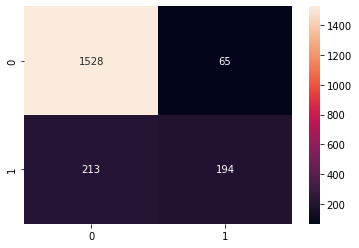

In [41]:
sns.heatmap(cm, annot=True, fmt='g')

### Pipeline Implementation

In [47]:
from sklearn.pipeline import Pipeline

In [48]:
model_RF = RandomForestClassifier(n_estimators=300, random_state=0)
scale = StandardScaler()
classifier_RF = Pipeline([('sc',scale), ('model', model_RF)])

In [49]:
classifier_RF.fit(X_train, y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('model',
                 RandomForestClassifier(n_estimators=300, random_state=0))])

In [51]:
y_test_pred = classifier_RF.predict(X_test)
y_test_pred

array([1, 0, 0, ..., 0, 0, 0])

In [52]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)
score = accuracy_score(y_test, y_test_pred)

In [53]:
print(report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.75      0.48      0.58       407

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [54]:
print(score)

0.861


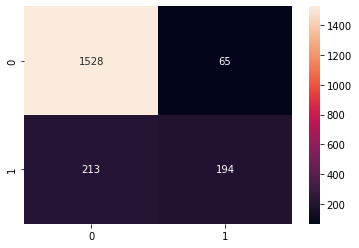

In [55]:
sns.heatmap(cm, annot=True, fmt='g')

### Grid Search Implementation

In [56]:
from sklearn.model_selection import GridSearchCV

In [62]:
classifier_RF = RandomForestClassifier()
parameters = { 'n_estimators': [100, 300, 500, 800, 1000], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False] }

In [63]:
classifier_RF_grid = GridSearchCV(estimator=classifier_RF, param_grid=parameters, cv=5,scoring='accuracy', n_jobs=-1)

In [64]:
classifier_RF_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 300, 500, 800, 1000]},
             scoring='accuracy')

In [66]:
best_parameters = classifier_RF_grid.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 300}


In [67]:
y_test_pred = classifier_RF_grid.predict(X_test)
y_test_pred

array([1, 0, 0, ..., 0, 0, 0])

In [68]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)
score = accuracy_score(y_test, y_test_pred)

In [69]:
print(report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.76      0.48      0.59       407

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



In [70]:
print(score)

0.864


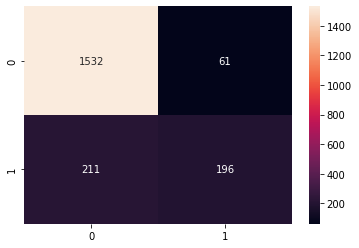

In [71]:
sns.heatmap(cm, annot=True, fmt='g')

### Pipeline with Grid Search Implementation

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [76]:
pca = PCA()
model_RF = RandomForestClassifier()
scale = StandardScaler()

classifier_RF = Pipeline([('pca', pca), ('sc', scale), ('model', model_RF)])
parameters = { 'pca__n_components': [2, 4, 6], 'model__n_estimators': [100, 300], 'model__criterion': ['gini', 'entropy'], 'model__bootstrap': [True, False] }

In [77]:
classifier_RF_grid = GridSearchCV(estimator=classifier_RF, param_grid=parameters, cv=5, scoring='accuracy', n_jobs=-1)

In [78]:
classifier_RF_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()), ('sc', StandardScaler()),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__bootstrap': [True, False],
                         'model__criterion': ['gini', 'entropy'],
                         'model__n_estimators': [100, 300],
                         'pca__n_components': [2, 4, 6]},
             scoring='accuracy')

In [79]:
best_parameters = classifier_RF_grid.best_params_
print(best_parameters)

{'model__bootstrap': True, 'model__criterion': 'gini', 'model__n_estimators': 300, 'pca__n_components': 6}


In [80]:
y_test_pred = classifier_RF_grid.predict(X_test)
y_test_pred

array([1, 0, 0, ..., 0, 0, 0])

In [81]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)
score = accuracy_score(y_test, y_test_pred)

In [82]:
print(report)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.71      0.43      0.53       407

    accuracy                           0.85      2000
   macro avg       0.79      0.69      0.72      2000
weighted avg       0.84      0.85      0.83      2000



In [83]:
print(score)

0.848


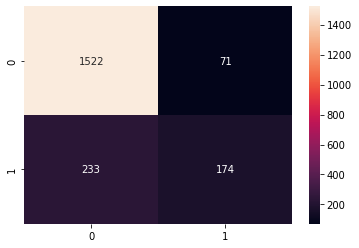

In [84]:
sns.heatmap(cm, annot=True, fmt='g')